In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [7]:
data = sns.load_dataset('penguins')
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [8]:
# Review the structure of the data, summary statistics, and data types
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [9]:
data.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [13]:
# remove rows with missing values
data = data.dropna()

In [14]:
data.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [15]:
# Create a new dataset that includes only the selected numeric features
numerical_cols = data.select_dtypes(include=['float64', 'int64'])


In [16]:
# Ensure all variables are properly formatted for numerical analysis
numerical_cols = numerical_cols.apply(pd.to_numeric, errors='coerce')


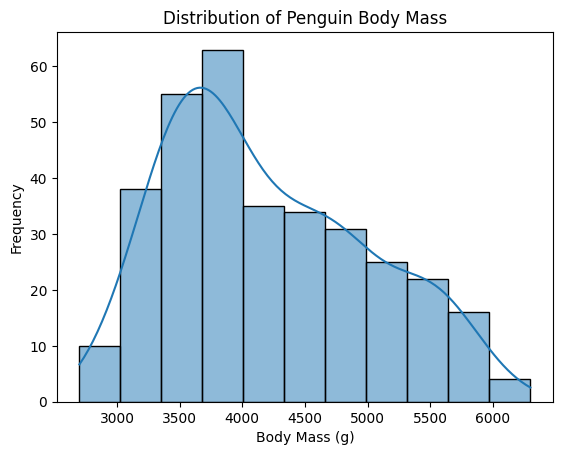

In [17]:
# Histogram showing the distribution of penguin body mass
sns.histplot(data=numerical_cols, x='body_mass_g', kde=True)
plt.title('Distribution of Penguin Body Mass')
plt.xlabel('Body Mass (g)')
plt.ylabel('Frequency')
plt.show()

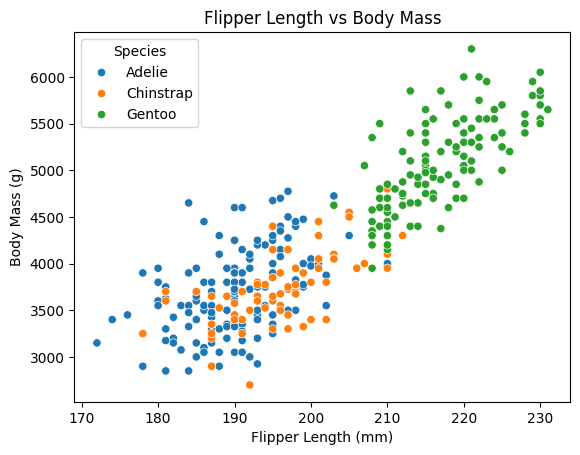

In [18]:
# Scatter plot to analyze the relationship between flipper length and body mass
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', data=data, hue='species')
plt.title('Flipper Length vs Body Mass')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.legend(title='Species')
plt.show()

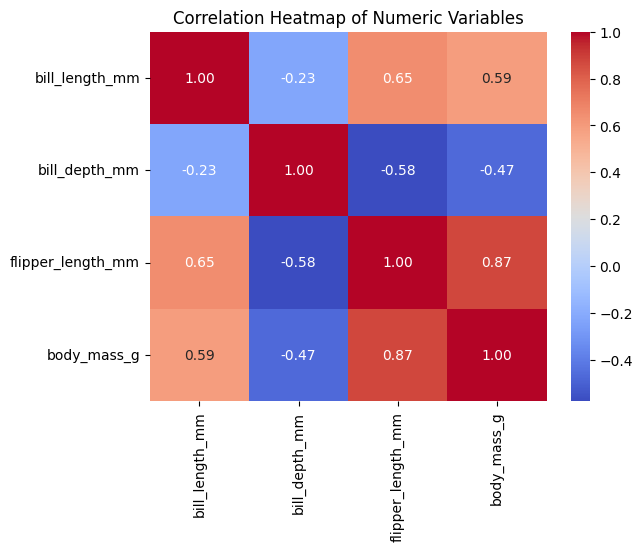

In [19]:
# Correlation heatmap to reveal relationships between all numeric variables
sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

In [22]:
# The heatmap reveals a strong positive correlation between body_mass_g and flipper_length_mm (correlation coefficient ~ 0.87). This indicates that penguins with longer flippers tend to have higher body mass.
# A similarly strong correlation is seen between body_mass_g and bill_length_mm, and a moderate correlation with bill_depth_mm

# Relationship Between Body Mass and Flipper Length:

#     The scatter plot shows a clear upward trend, suggesting a linear relationship: as flipper length increases, body mass also increases.

#     Different species cluster in different regions of the scatter plot, which may indicate species-level differences in size and proportion


# Trends & Outliers:

    # Most data points form a clear upward trend, but a few outliers exist — possibly due to measurement errors or biological anomalies.

    # For example, there are a few penguins with long flippers but relatively low body mass, which deviate from the overall pattern.